In [1]:
from Helpers import *
from ILQGController import *

In [39]:

def f(x,u):
    tau = 0.06
    C = np.array([-x[3]*(2*x[2]+x[3])*a2*np.sin(x[1]),x[2]*x[2]*a2*np.sin(x[1])])
    Denominator = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    Minv = np.array([[a3/Denominator,(-a2*np.cos(x[1])-a3)/Denominator],[(-a2*np.cos(x[1])-a3)/Denominator,(2*a2*np.cos(x[1])+a1)/Denominator]])
    theta = Minv@(T@x[4:7]-Bdyn@x[2:4]-C)
    torque = (u-x[4:7])/tau
    return np.array([[x[2],x[3],theta[0],theta[1],torque[0],torque[1],torque[2]]])

def complex_derivative_1(x):
    D = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    Dprime = 2*a2*a2*np.cos(x[1])*sin(x[1])
    F1 = x[4]+T[0,2]*x[6]-Bdyn[0]@x[2:4]
    F2 = x[5]+T[1,2]*x[6]-Bdyn[1]@x[2:4]
    C1 = -x[3]*(2*x[2]+x[3])*a2*np.sin(x[1])
    C1prime = -x[3]*(2*x[2]+x[3])*a2*np.cos(x[1])
    C2 = x[2]*x[2]*a2*np.sin(x[1])
    C2prime = x[2]*x[2]*a2*np.cos(x[1])
    Sol = -a3*Dprime/(D*D)*F1-a3/(D*D)*(C1prime*D-C1*Dprime)-((F2-C2)/(D*D)*((-a2*sin(x[1]))*D-(a2*cos(x[1])+a3)*Dprime)-C2prime*(a2*cos(x[1])+a3)/D)
    return Sol

def complex_derivative_2(x):
    D = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    C1prime = -x[3]*2*a2*np.sin(x[1])
    C2prime = x[2]*2*a2*np.sin(x[1])
    Sol = -a3/D*(Bdyn[0,0]+C1prime)+(a2*cos(x[1])+a3)/D*(Bdyn[1,0]+C2prime)
    return Sol

def complex_derivative_3(x):
    D = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    C1prime =(-2*x[2]-2*x[3])*a2*np.sin(x[1])
    Sol = -a3/D*(Bdyn[0,1]+C1prime)+(a2*cos(x[1])+a3)/D*(Bdyn[1,1])
    return Sol

def complex_derivative_4(x):
    D = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    Dprime = 2*a2*a2*np.cos(x[1])*sin(x[1])
    F1 = x[4]+T[0,2]*x[6]-Bdyn[0]@x[2:4]
    F2 = x[5]+T[1,2]*x[6]-Bdyn[1]@x[2:4]
    C1 = -x[3]*(2*x[2]+x[3])*a2*np.sin(x[1])
    C1prime = -x[3]*(2*x[2]+x[3])*a2*np.cos(x[1])
    C2 = x[2]*x[2]*a2*np.sin(x[1])
    C2prime = x[2]*x[2]*a2*np.cos(x[1])
    Sol = ((a2*sin(x[1]))*D+(a2*cos(x[1])+a3)*Dprime)/(D*D)*(F1-C1)+(-a2*cos(x[1])-a3)/D*(-C1prime)+(-2*a2*sin(x[1])*D-(2*a2*cos(x[1])+a1)*Dprime)/(D*D)*(F2-C2)+(2*a2*cos(x[1])+a2)/D*(-C2prime)
    return Sol

def complex_derivative_5(x):
    D = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    C1prime = -x[3]*2*a2*np.sin(x[1])
    C2prime = 2*x[2]*a2*np.sin(x[1])
    Sol = (a2*cos(x[1])+a3)/D*(Bdyn[0,0]+C1prime)+(2*a2*cos(x[1])+a1)/D*(-Bdyn[1,0]-C2prime)
    return Sol

def complex_derivative_6(x):
    D = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    C1prime = (-2*x[2]-2*x[3])*a2*np.sin(x[1])
    Sol = (a2*cos(x[1])+a3)/D*(Bdyn[0,1]+C1prime)+(2*a2*cos(x[1])+a1)/D*(-Bdyn[1,1])
    return Sol

def easy_derivative_1(x):
    D = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    Sol = a3/D
    return Sol

def easy_derivative_2(x):
    D = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    Sol = -(a2*cos(x[1])+a3)/D
    return Sol

def easy_derivative_3(x):
    D = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    Sol = (2*a2*cos(x[1])+a1)/D
    return Sol



def fx(x,u):
    tau = 0.06
    return np.array([[0,0,1,0,0,0,0],
                     [0,0,0,1,0,0,0],
                     [0,complex_derivative_1(x),complex_derivative_2(x),complex_derivative_3(x),easy_derivative_1(x),easy_derivative_2(x),T[0,2]*(easy_derivative_1(x)+easy_derivative_2(x))],
                     [0,complex_derivative_4(x),complex_derivative_5(x),complex_derivative_6(x),easy_derivative_2(x),easy_derivative_3(x),T[1,2]*(easy_derivative_3(x)+easy_derivative_2(x))],
                     [0,0,0,0,-1/tau,0,0],
                     [0,0,0,0,0,-1/tau,0],
                     [0,0,0,0,0,0,-1/tau]])

def fu(x,u):
    tau = 0.06
    return np.array([[0,0,0],
                     [0,0,0],
                     [0,0,0],
                     [0,0,0],
                     [1/tau,0,0],
                     [0,1/tau,0],
                     [0,0,1/tau]])

def l(x,u,r1):
    return r1*(u[0]*u[0]+u[1]*u[1]+u[2]*u[2])

def lx(x,u):
    return np.zeros(len(x))

def lu(x,u,r1):
    return np.array([2*u[0]*r1,2*u[1]*r1,2*u[2]*r1])

def lxx(x,u):
    return np.zeros((len(x),len(x)))

def luu(x,u,r1):
    return np.array([[2*r1,0,0],[0,2*r1,0],[0,0,2*r1]])

def h(x,w1,w2,xtarg):
    return w1/2*((x[0]-xtarg[0])*(x[0]-xtarg[0])+(x[1]-xtarg[1])*(x[1]-xtarg[1])) + w2/2*(x[2]*x[2]+x[3]*x[3])

def hx(x,w1,w2,xtarg):
    return np.array([w1*(x[0]-xtarg[0]),w1*(x[1]-xtarg[1]),w2*x[2],w2*x[3],0,0,0])

def hxx(x,w1,w2):
    return np.array([[w1,0,0,0,0,0,0],
                     [0,w1,0,0,0,0,0],
                     [0,0,w2,0,0,0,0],
                     [0,0,0,w2,0,0,0],
                     [0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0]])

def GetNoise(alpha,multvar,dt,N,kdelay):
    B_basic = np.array([[0,0,0],[0,0,0],[0,0,0],[0,0,0],[dt,0,0],[0,dt,0],[0,0,dt]])
    B = np.zeros((N*(kdelay+1),3))
    B[:N] = B_basic 
    return Compute_Multiplicative_Noise(N,alpha,B,multvar)

In [3]:
def ILQG(Duration,w1,w2,r1,targets,K,start,plot = True,Noise = False,alpha = 1,Delay = 0,multvar = 1e-2,FF = False,Side = "Left",Variance = 1e-6):
    obj1,obj2 = newton(fnewton,dfnewton,1e-8,1000,targets[0],targets[1]) #Defini les targets
    st1,st2 = newton(fnewton,dfnewton,1e-8,1000,start[0],start[1])

    x0 = np.array([st1,st2,0,0,0,0,0])
    O,_,_,_,C,_ = GetNoise(alpha,multvar,Duration/K,len(x0),0)
    O=np.zeros((7,7))
    O[6,6] = Variance
    O[5,5] = Variance
    O[4,4] = Variance
    m = 3
    n = 7
    u = np.zeros((K-1,m))
    dt = Duration/K
    kdelay = int(Delay/dt)
    newcbold = np.zeros((K,m,n))
    newC = np.zeros((K,m,n,m))
    for i in range(K):
        for j in range(m):
            newcbold[i,j] = np.diag(O)[j]
        newC[i] = C
    C = newC 
    cbold = newcbold
    u_incr = [1]
    oldx = np.ones(K)*100
    # Create an array of 50 colors from the colormap

    for _ in range(50):     
        x = step1(x0,u,Duration,False)
        X = np.cos(x[:,0]+x[:,1])*33+np.cos(x[:,0])*30
        Y = np.sin(x[:,0]+x[:,1])*33+np.sin(x[:,0])*30
        if np.max(np.abs(oldx-X))<1e-3:
            x = step5(x0,l,L,Duration,Noise,alpha,multvar,A,B,K,u-u_incr,FF,Side,kdelay,Variance)
            #x = step1(x0,u,Duration,Noise)
            X = np.cos(x[:,0]+x[:,1])*33+np.cos(x[:,0])*30
            Y = np.sin(x[:,0]+x[:,1])*33+np.sin(x[:,0])*30
            break

        A,B,q,qbold,r,Q,R = step2(x,u,Duration,w1,w2,r1,np.array([obj1,obj2]))
        l,L = step3(A,B,C,cbold,q,qbold,r,Q,R)
        u_incr = step4(l,L,K,A,B)
        u += u_incr
        oldx = np.copy(X)
        
    Xtg = targets[0]
    Ytg = targets[1]

        #Plotting
    if plot :
        plt.grid(linestyle='--')
        plt.axis("equal")
        plt.plot(X,Y,linewidth = .8,color = "blue",label = "ILQG")
        plt.xlabel("X [cm]")
        plt.ylabel("Y [cm]")
        plt.scatter([Xtg],[Ytg],color = "black")
    return X,Y,u,x

In [26]:
def step1(x0,u,Duration,Noise):
    
    K = np.shape(u)[0]+1
    dt = Duration/(K-1)
    newx = np.zeros((K,len(x0)))
    newx[0] = np.copy(x0)
    for i in range(K-1):
        newx[i+1] = newx[i] + dt*f(newx[i],u[i])
    return newx
def Compute_acc(x,F):
    C = np.array([-x[3]*(2*x[2]+x[3])*a2*np.sin(x[1]),x[2]*x[2]*a2*np.sin(x[1])])
        
    M = np.array([[a1+2*a2*cos(x[1]),a3+a2*cos(x[1])],[a3+a2*cos(x[1]),a3]])

    return np.linalg.solve(M,(x[4:6]-Bdyn@(x[2:4])-C))+F
def step5(x0,l,L,Duration,Noise,alpha,mult_var,A,B,Num_steps,bestu,FF,Side,kdelay,Variance):
    
    dt = Duration/(Num_steps-1)
    Num_Var = len(x0)
    

    x0 = np.tile(x0, kdelay + 1) 
    xref = np.zeros((Num_steps,Num_Var*(kdelay + 1)))
    xref[0] = np.copy(x0)
    newx = np.zeros((Num_steps,Num_Var*(kdelay + 1)))
    newx[0] = np.copy(x0)
    xhat = np.zeros((Num_steps,Num_Var*(kdelay + 1)))
    
    H = np.zeros((Num_Var,(kdelay+1)*Num_Var))
    H[:,(kdelay)*Num_Var:]= np.identity(Num_Var)

    sigma = np.zeros((Num_Var*(kdelay+1),Num_Var*(kdelay+1)))
    for i in range(Num_steps-1):
        Extended_A = np.zeros(((kdelay+1)*Num_Var,(kdelay+1)*Num_Var))
        Extended_A[:Num_Var,:Num_Var] = A[i]
        Extended_A[Num_Var:,:-Num_Var] = np.identity((kdelay)*Num_Var)
        Extended_B = np.zeros(((kdelay+1)*Num_Var,3))
        Extended_B[:Num_Var] = B[i]

        if FF == True:
            if i == 0 : acc = np.zeros(2)
            else : acc = Compute_acc(newx[i],F)
            F=Compute_f_new_version(newx[i,0:2],newx[i,2:4],acc,.3)
            if Side == "Left": F*=-1
            
        else : 
            F = np.array([0,0])

        deltau = l[i]+L[i]@xhat[i,:Num_Var]
        u = bestu[i] + deltau
        Omega_sens,motor_noise,Omega_measure,measure_noise,C,mult_noise = GetNoise(alpha,mult_var,dt,Num_Var,kdelay)
        Omega_sens=np.zeros((len(x0),len(x0)))
        Omega_sens[6,6] = Variance
        Omega_sens[5,5] = Variance
        Omega_sens[4,4] = Variance
        K,sigma = Kalman(Omega_measure,Omega_sens,Extended_A,sigma,H)

        passed_newx = np.copy(newx[i,:-Num_Var])
        newx[i+1,:Num_Var] = newx[i,:Num_Var] + dt*f(newx[i,:Num_Var],u)
        newx[i+1,Num_Var:] = passed_newx
        newx[i+1,2:4]+=dt*F

        passed_xref = np.copy(xref[i,:-Num_Var])
        xref[i+1,:Num_Var] = xref[i,:Num_Var] + dt*f(xref[i,:Num_Var],u)
        xref[i+1,Num_Var:] = passed_xref
        
        if Noise: 
            newx[i,4:4+len(u)]+=np.random.normal(0,np.sqrt(Variance),len(u))
            #newx[i+1]+= motor_noise #+ mult_noise@u
        y = H@(newx[i]-xref[i])
        if Noise : y+=measure_noise
        xhat[i+1] = Extended_A@xhat[i] + Extended_B@deltau + K@(y-H@xhat[i])
        
    return newx

def step2(x,u,Duration,w1,w2,r1,xtarg):
    n = len(x[0])
    m = len(u[0])
    K = np.shape(u)[0]+1
    dt = Duration/(K-1)
    A = np.zeros((K-1,n,n))
    B = np.zeros((K-1,n,m))
    q = np.zeros(K)
    qbold = np.zeros((K,n))
    r = np.zeros((K-1,m))
    Q = np.zeros((K,n,n))
    R = np.zeros((K-1,m,m))
    for i in range(K-1):
        A[i] = np.identity(n)+dt*fx(x[i],u[i])
        B[i] = dt*fu(x[i],u[i])
        q[i] = dt*l(x[i],u[i],r1)
        qbold[i] = dt*lx(x[i],u[i])
        r[i] = dt*lu(x[i],u[i],r1)
        Q[i] = dt*lxx(x[i],u[i])
        R[i] = dt*luu(x[i],u[i],r1)

    q[K-1] = h(x[K-1],w1,w2,xtarg)
    qbold[K-1] = hx(x[K-1],w1,w2,xtarg)
    Q[K-1] = hxx(x[K-1],w1,w2)
    return A,B,q,qbold,r,Q,R

def step3(A,B,C,cbold,q,qbold,r,Q,R):
    # C should be nxm 
    # c should be nx1

    K = A.shape[0]+1
    n,m = np.shape(B[0])
    S = np.zeros((K,n,n))
    s = np.zeros(K)
    sbold = np.zeros((K,n))
    l = np.zeros((K-1,m))
    L = np.zeros((K-1,m,n))

    S[-1] = Q[-1]
    s[-1] = q[-1]
    sbold[-1] = qbold[-1]

    for k in np.arange(K-2,-1,-1):
        temp1 = 0
        temp2 = 0
        temp3 = 0
        for i in range(m):
            temp1+=C[k,i,:,:].T@S[k+1]@cbold[k,i,:]
            temp2+=C[k,i,:,:].T@S[k+1]@C[k,i,:,:]
            temp3+=cbold[k,i,:].T@S[k+1]@cbold[k,i,:]
        gbold = r[k] + B[k].T@sbold[k+1]+temp1
        G = B[k].T@S[k+1]@A[k]
        H = R[k] + B[k].T@S[k+1]@B[k]+temp2
        Hinv = np.linalg.inv(H)


        S[k] = Q[k] + A[k].T@S[k+1]@A[k]-G.T@Hinv@G
        sbold[k] = qbold[k]+A[k].T@sbold[k+1]-G.T@Hinv@gbold
        s[k] = q[k] + s[k+1] + 0.5*temp3 - .5*gbold.T@Hinv@gbold

        l[k] = -Hinv@gbold
        L[k] = -Hinv@G
    
    return l,L

def step4(l,L,K,A,B):
    m,n = L[0].shape
    x = np.zeros(n)
    u_incr = np.zeros((K-1,m))
    for k in range(K-1):
        u_incr[k] = l[k]+L[k]@x
        x = A[k]@x+B[k]@u_incr[k]
    return u_incr


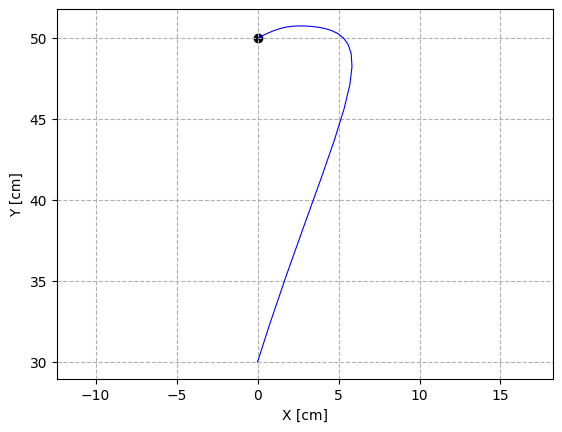

In [81]:
T = np.array([[1,0,.5],[0,1,-.5]])
_=ILQG(.6,1e6,1e4,1e-4,targets=[0,50],K=30,start = [0,30],Noise = False,FF=False)